# Women in 120 years of Olympic history

| GROUP                 | 12 |
| --------------------- | ----------------------- |
| Level                 | 7 (Postgraduate)        |
| Course name           | MSc Business Analytics  |
| Module code           | MN5813                  |
| Module tutor          | Alex Reppel             |
| Assignment number     | 12  |
| Assignment title      | Women in 120 years of Olympic history  |

| Candidate number(s)                  |
| ------------------------------------ |
| [CANDIDATE NUMBER FOR GROUP MEMBER 1 |
| [CANDIDATE NUMBER FOR GROUP MEMBER 2 |
| [CANDIDATE NUMBER FOR GROUP MEMBER 3 |

## A. Project summary

This report leverages the Kaggle dataset "120 years of Olympic history: athletes and results”, which offers an extensive record of Olympic athletes and outcomes from Athens 1896 to Rio 2016, to outline the ideal profile of female athletes over 120 years of Olympic history. By examining trends in female participation, age group distributions across sports, and key physical characteristics such as height and weight, the report provides insights into the unique contributions and achievements of female athletes. The aim of this report is twofold: first, to inspire women who aspire to participate in the Olympics by showcasing the diverse profiles of successful female athletes, and second, to underscore the importance of sustained support for women's participation in sports. By shedding light on the progress made and the barriers overcome, this report highlights the vital need for continued advocacy and resources to further gender equality in the Olympic Games

## B. Generative AI

## C. Introduction

Over the past 120 years, the role and representation of women in the Olympics have gone through remarkable transformations, overcoming significant societal and institutional resistance. Pierre de Coubertin, the founder of the modern Olympic Games, although saying that sport open an opportunity for every man, woman and child, was openly resistant to the idea of women participating in the Olympics (Wilant and Hirthler, 2024). His belief that women’s participation would undermine the purpose and prestige of the Games reflects the deeply ingrained gender biases of the era. Despite his opposition, the inclusion of women in the 1900 Paris Olympics marked the beginning of a long journey toward gender equality in sports.

The article "The Changing Role of Women in the Olympic Games" (DeFrantz, 1997) provides a comprehensive account of the challenges and milestones faced by women athletes. The article sheds light on the controversies surrounding women’s participation in traditionally male-dominated sports. For example, the 1928 Amsterdam Games saw the inclusion of women’s track events, but backlash over perceived exhaustion led to the removal of the 800-meter race for decades. The article also underscores the broader cultural and political shifts that enabled greater inclusion of women in the Olympics, such as the rise of feminist movements and the recognition of sports as a tool for empowerment. By the end of the 20th century, the Olympics had moved closer to gender parity, with women participating in nearly all sports categories by the 2000 Games in Sydney

This literature highlights the enduring struggle for women’s representation in the Olympics and provides a valuable context for analysing historical data. The progressive inclusion of women in the Games serves as a testament to the resilience of female athletes and advocates who challenged societal norms to achieve equality. This review forms the foundation for this report's exploration of the participation trends, age group distributions, and physical characteristics of female athletes over the last 120 years.

This report focuses on the following aspects:

* Female Participation Over the Years: How the representation of women in the Olympics has grown since their first participation in 1900.
* Age Group Distribution by Sport: Identifying the most common age ranges for women competing in different sports.
* Physical Characteristics of Female Medallists: Highlighting the height and weight trends of female medallists during the 20th and 21st centuries.
mes.


## D. Setup

### 1. Import necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import seaborn as sns

### 2. Load data

In [12]:
athlete_events = pd.read_csv("/Users/chaule/Desktop/Group assessment/archive/athlete_events.csv")
noc_regions = pd.read_csv("/Users/chaule/Desktop/Group assessment/archive/noc_regions.csv")

### 3. Convert into DataFrame

In [14]:
athlete_events_df = pd.DataFrame(athlete_events)
noc_regions_df = pd.DataFrame(noc_regions)

In [15]:
#merge table
report_df = pd.merge(athlete_events_df,noc_regions_df, on="NOC", how="left")

In [16]:
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [17]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


## E. Data Management

### 1. Data cleaning

In [19]:
report_df.dropna()
report_df['Medal'] = report_df['Medal'].fillna('No Medal')
report_df[['region','notes']] = report_df[['region','notes']].fillna('No data')
report_df['Age'] = report_df['Age'].fillna(report_df['Age'].mean())
report_df['Height'] = report_df['Height'].fillna(report_df['Height'].mean())
report_df['Weight'] = report_df['Weight'].fillna(report_df['Weight'].mean())
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data


In [20]:
report_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
notes     0
dtype: int64

In [21]:
report_df.duplicated().sum()

1385

In [22]:
report_df = report_df.drop_duplicates()
report_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,Poland,No data
271112,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,Poland,No data
271113,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,Poland,No data
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,Poland,No data


In [23]:
report_df = report_df.astype({'Year':'str'})
report_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  float64
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  object 
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   269731 non-null  object 
 15  region  269731 non-null  object 
 16  notes   269731 non-null  object 
dtypes: float64(3), int64(1), object(13)
memory usage: 37.0+ MB


### 2. Data wrangling

In [25]:
report_df["Age_range"] = pd.cut(report_df["Age"], bins=[0,18,25,35,100], labels=["0 - 18", "19 - 25", "26 - 35", "36 +"])
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_range
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25


In [26]:
report_df["Organiser"] = report_df["City"] + "_" + report_df["Year"]
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_range,Organiser
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25,Barcelona_1992
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25,London_2012
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25,Antwerpen_1920
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35,Paris_1900
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25,Calgary_1988


In [27]:
report_df['Discipline'] = report_df['Event'].str.split(r"(Men's|Women's)", n=1, expand=True)[2]
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_range,Organiser,Discipline
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25,Barcelona_1992,Basketball
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25,London_2012,Extra-Lightweight
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25,Antwerpen_1920,Football
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35,Paris_1900,Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25,Calgary_1988,500 metres


In [28]:
report_df = report_df.astype({'Year':'int'})
report_df['Century'] = pd.cut(report_df["Year"], bins=[0, 1901, 2001, 3000], labels=["19th","20th","21st"])
report_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Age_range,Organiser,Discipline,Century
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No data,19 - 25,Barcelona_1992,Basketball,20th
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No data,19 - 25,London_2012,Extra-Lightweight,21st
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No data,19 - 25,Antwerpen_1920,Football,20th
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No data,26 - 35,Paris_1900,Tug-Of-War,19th
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No data,19 - 25,Calgary_1988,500 metres,20th


### 3. Data analysis

#### i. Participant over time

In [31]:
summer_df =  report_df[report_df["Season"] == "Summer"]
gender_count_summer = summer_df.groupby(['Year', 'Sex'])['ID'].count().reset_index()

gender_count_summer_pivot = gender_count_summer.pivot_table(
    index='Year', 
    columns='Sex', 
    values='ID',
    fill_value=0,
).reset_index()

gender_count_summer_pivot['%Growth_F'] = (gender_count_summer_pivot['F'].pct_change() * 100).round(2)
gender_count_summer_pivot['%Growth_M'] = (gender_count_summer_pivot['M'].pct_change() * 100).round(2)

winter_df =  report_df[report_df["Season"] == "Winter"]
gender_count_winter = winter_df.groupby(['Year', 'Sex'])['ID'].count().reset_index()

gender_count_winter_pivot = gender_count_winter.pivot_table(
    index='Year', 
    columns='Sex', 
    values='ID',
    fill_value=0,
).reset_index()

gender_count_winter_pivot['%Growth_F'] = (gender_count_winter_pivot['F'].pct_change() * 100).round(2)
gender_count_winter_pivot['%Growth_M'] = (gender_count_winter_pivot['M'].pct_change() * 100).round(2)

combined_pivot = pd.concat(
    [gender_count_summer_pivot.set_index('Year'), gender_count_winter_pivot.set_index('Year')],
    axis=1, 
    keys=["Summer", "Winter"]
)

combined_pivot = combined_pivot.replace([float('inf'), float('-inf')], np.nan).fillna(0).sort_index(axis=0, level=0, ascending=True)

combined_pivot

Summer                              Winter                            
Sex        F       M %Growth_F %Growth_M       F       M %Growth_F %Growth_M
Year                                                                        
1896     0.0   380.0      0.00      0.00     0.0     0.0      0.00      0.00
1900    33.0  1865.0      0.00    390.79     0.0     0.0      0.00      0.00
1904    16.0  1285.0    -51.52    -31.10     0.0     0.0      0.00      0.00
1906    11.0  1722.0    -31.25     34.01     0.0     0.0      0.00      0.00
1908    47.0  3022.0    327.27     75.49     0.0     0.0      0.00      0.00
1912    87.0  3953.0     85.11     30.81     0.0     0.0      0.00      0.00
1920   134.0  4158.0     54.02      5.19     0.0     0.0      0.00      0.00
1924   234.0  4876.0     74.63     17.27    17.0   443.0      0.00      0.00
1928   391.0  4265.0     67.09    -12.53    33.0   549.0     94.12     23.93
1932   265.0  2200.0    -32.23    -48.42    22.0   330.0    -33.33    -39.89
1936   447.0  5804.0     68.68    163.82    81.0   814.0    268.18    146.67
1948   610.0  5698.0     36.47     -1.83   133.0   942.0     64.20     15.72
1952  1497.0  6773.0    145.41     18.87   185.0   903.0     39.10     -4.14
1956   893.0  4234.0    -40.35    -37.49   246.0  1061.0     32.97     17.50
1960  1435.0  6684.0     60.69     57.86   295.0   821.0     19.92    -22.62
1964  1348.0  6354.0     -6.06     -4.94   404.0  1374.0     36.95     67.36
1968  1777.0  6811.0     31.82      7.19   416.0  1475.0      2.97      7.35
1972  2193.0  8111.0     23.41     19.09   415.0  1240.0     -0.24    -15.93
1976  2172.0  6469.0     -0.96    -20.24   434.0  1427.0      4.58     15.08
1980  1756.0  5435.0    -19.15    -15.98   430.0  1316.0     -0.92     -7.78
1984  2447.0  7007.0     39.35     28.92   536.0  1598.0     24.65     21.43
1988  3543.0  8494.0     44.79     21.22   680.0  1959.0     26.87     22.59
1992  4124.0  8853.0     16.40      4.23  1054.0  2382.0     55.00     21.59
1994     0.0     0.0      0.00      0.00  1105.0  2055.0      4.84    -13.73
1996  5008.0  8772.0     21.44     -0.91     0.0     0.0      0.00      0.00
1998     0.0     0.0      0.00      0.00  1384.0  2221.0     25.25      8.08
2000  5431.0  8390.0      8.45     -4.35     0.0     0.0      0.00      0.00
2002     0.0     0.0      0.00      0.00  1582.0  2527.0     14.31     13.78
2004  5546.0  7897.0      2.12     -5.88     0.0     0.0      0.00      0.00
2006     0.0     0.0      0.00      0.00  1757.0  2625.0     11.06      3.88
2008  5816.0  7786.0      4.87     -1.41     0.0     0.0      0.00      0.00
2010     0.0     0.0      0.00      0.00  1847.0  2555.0      5.12     -2.67
2012  5815.0  7105.0     -0.02     -8.75     0.0     0.0      0.00      0.00
2014     0.0     0.0      0.00      0.00  2023.0  2868.0      9.53     12.25
2016  6223.0  7465.0      7.02      5.07     0.0     0.0      0.00      0.00

#### ii. General Age group by sport for women

In [33]:
women_only_df = report_df[report_df["Sex"]=="F"]

average_age_women = women_only_df.groupby('Sport')['Age'].agg(['mean', 'min', 'max', 'count']).sort_values(by='mean', ascending=False).round(1)

average_age_women

,mean,min,max,count
Sport,,,,
Alpinism,43.0,43.0,43.0,1
Art Competitions,39.7,17.0,74.0,233
Croquet,34.9,25.6,46.0,6
Equestrianism,34.2,16.0,69.0,1246
Curling,30.0,17.0,48.0,222
Shooting,29.1,16.0,57.0,1724
Beach Volleyball,28.3,18.0,39.0,276
Triathlon,27.9,18.0,40.0,263
Bobsleigh,27.8,19.0,39.0,143


#### iii. Characteristics of an medal winning athlete

In [35]:
women_medalist_df = women_only_df[women_only_df["Medal"] != "No Medal"]

# Group by Age Range and Medal, and compute mean and count for both Height and Weight
body_type_women = women_medalist_df.groupby(['Age_range', 'Medal','Sport'])[['Height', 'Weight']].agg(['mean']).fillna(0)

# Sort by Age_range in descending order
body_type_women = body_type_women.sort_values(by=('Height', 'mean'), ascending=False)

# Display the updated dataframe
body_type_women

/var/folders/_q/_1qz9q3n1jg2kw48t2lw_tk00000gn/T/ipykernel_21037/2147775061.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  body_type_women = women_medalist_df.groupby(['Age_range', 'Medal','Sport'])[['Height', 'Weight']].agg(['mean']).fillna(0)


Height Weight
                                         mean   mean
Age_range Medal  Sport                              
0 - 18    Bronze Basketball        204.000000  115.0
36 +      Bronze Beach Volleyball  191.000000   73.0
          Silver Volleyball        188.000000   85.0
19 - 25   Silver Beach Volleyball  187.000000   72.0
36 +      Gold   Basketball        185.333333   74.0
...                                       ...    ...
          Bronze Football            0.000000    0.0
                 Freestyle Skiing    0.000000    0.0
0 - 18    Bronze Wrestling           0.000000    0.0
                 Water Polo          0.000000    0.0
          Gold   Skeleton            0.000000    0.0

[612 rows x 2 columns]

In [36]:
medal_count = report_df.groupby(['Sport', 'Name','Sex','Age'])['Medal'].count()

sorted_medal_count = medal_count.sort_values(ascending=False)

top_medalists = sorted_medal_count.groupby('Sport').head(1)

top_medalists.reset_index()

,Sport,Name,Sex,Age,Medal
0,Shooting,Ioannis Theofilakis,M,25.556898,36
1,Gymnastics,Henry John Finchett,M,25.556898,17
2,Swimming,Mohamed Bin Abid,M,19.000000,10
3,Fencing,Karl August Petri,M,25.556898,9
4,Athletics,Eric Otto Valdemar Lemming,M,26.000000,8
...,...,...,...,...,...
61,Beach Volleyball,Zhang Xi,F,23.000000,1
62,Basque Pelota,Francisco Villota y Baquiola,M,26.000000,1
63,Alpinism,Charles John Morris,M,25.556898,1
64,Cricket,Alfred James Bowerman,M,26.000000,1


### 4. Data Visualisation

In [38]:
import hvplot.pandas

In [39]:
plt.style.use("classic")

#### i. Movement of female athletes over 120 years

In [41]:
gender_count = report_df.groupby(['Season','Year', 'Sex'])['ID'].count().reset_index()

gender_distribution_plot = gender_count.hvplot.line(
    x='Year', 
    y='ID', 
    by='Sex',
    groupby='Season',
    xlabel='Year', 
    ylabel='Number of Athletes', 
    title='Athlete Distribution by Gender Over Time', 
    height=400, 
    width=800,
    line_width=2,
    legend='top'
)

In [42]:
female_df = report_df[report_df["Sex"] == "F"]
female_count = female_df.groupby(['Season','Year', 'Sex'])['ID'].count().reset_index()
female_count["%Change_F"] = (female_count["ID"].pct_change() * 100).round(2)
female_change_plot = female_count.hvplot.line(
    x='Year', 
    y='%Change_F', 
    groupby='Season',
    xlabel='Year', 
    ylabel='Number of Athletes', 
    title='Percentage change in Female Athlete Participating Over Time', 
    height=200, 
    width=800,
    line_width=2,
    legend='top'
)

# Add a horizontal line at y=0
horizontal_line = hv.HLine(0).opts(line_color='red', line_width=1, line_dash='dashed')

# Combine the plot with the horizontal line at y=0
(gender_distribution_plot+ (female_change_plot * horizontal_line)).cols(1)



:Layout
   .DynamicMap.I  :DynamicMap   [Season]
      :NdOverlay   [Sex]
         :Curve   [Year]   (ID)
   .DynamicMap.II :DynamicMap   [Season]
      :Overlay
         .Curve.I :Curve   [Year]   (%Change_F)
         .HLine.I :HLine   [x,y]

#### ii. Age Distribution of Female Athletes by Sport

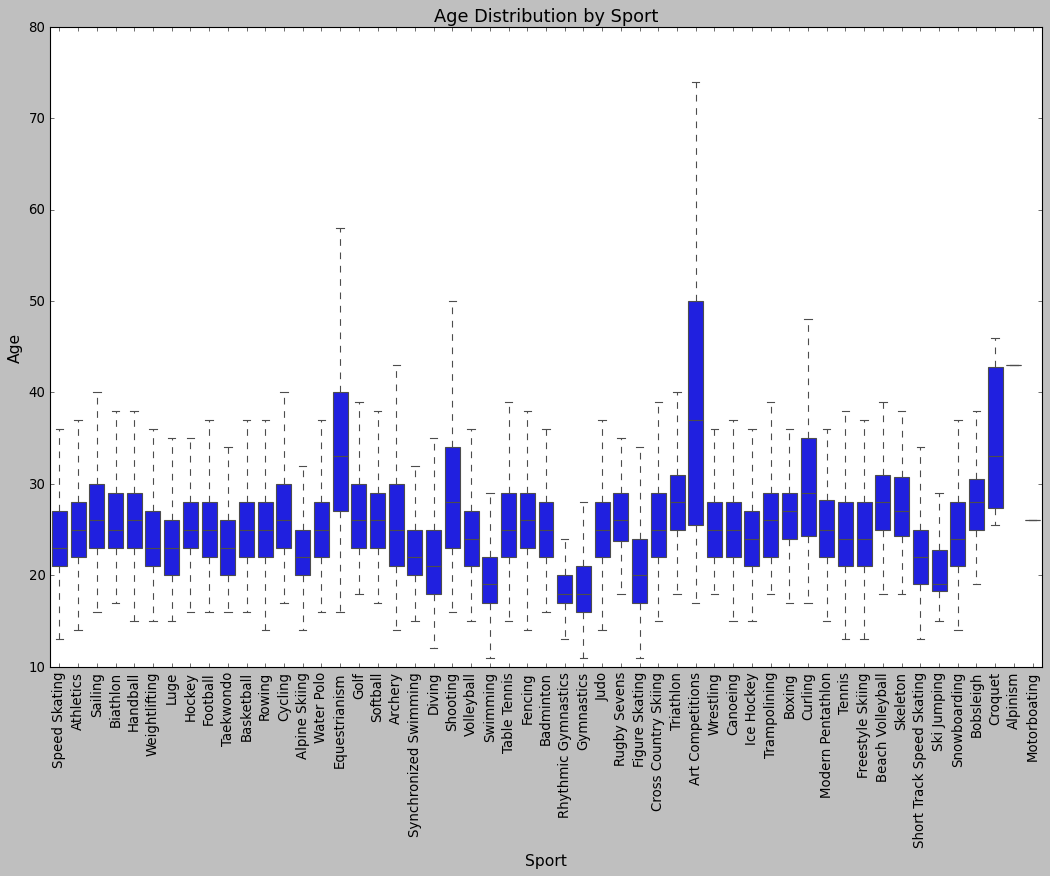

In [44]:
# Create a boxplot to show distribution of Age by Sport
plt.figure(figsize=(16, 10))  # Set figure size
sns.boxplot(data=women_only_df, x='Sport', y='Age', showfliers=False)  # Boxplot without outliers

# Title and axis labels
plt.title('Age Distribution by Sport', fontsize=16)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Rotate x-axis labels to prevent overlap if needed
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


#### iii. Transformation of Physical Characteristics of Female Athletes through centuries

<Figure size 1200x800 with 0 Axes>

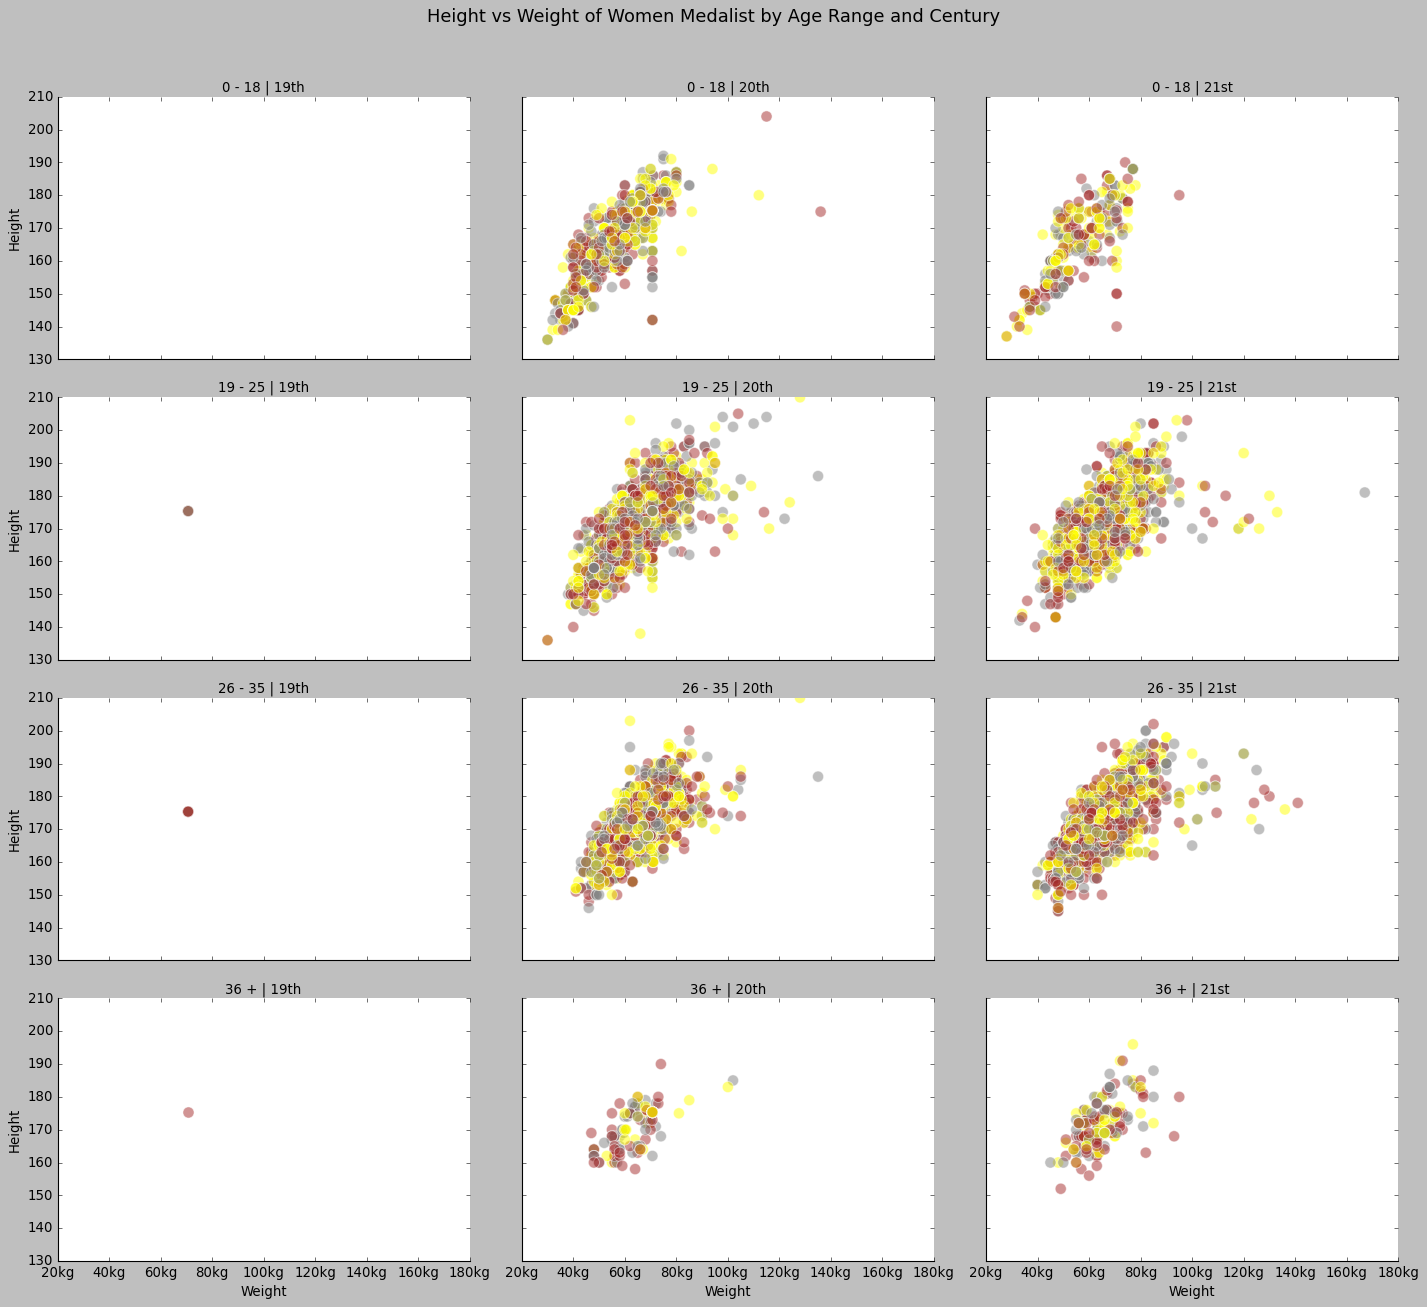

In [89]:
# Create a figure with subplots for different metrics by product category
fig = plt.figure(figsize=(15, 10))

medal_colors = {
    "Gold": "yellow",
    "Silver": "grey",
    "Bronze": "brown"
}

g = sns.FacetGrid(data=women_medalist_df, 
                  col="Century",
                  row="Age_range",
                  height=4,
                  aspect=1.5)

# Add the plots
g.map_dataframe(sns.scatterplot, 
                x="Weight",
                y="Height",
                alpha=0.5,
                s=100,
                sizes=(20, 200),
                hue="Medal",
               palette=medal_colors
               )

# Customise the plots
g.set_axis_labels("Weight", "Height")
g.set_titles(col_template="{col_name}",
            row_template="{row_name}")

# Add a title to the overall figure
g.fig.suptitle("Height vs Weight of Women Medalist by Age Range and Century", 
               y=1.02, 
               fontsize=16)

# Format x-axis labels to show currency
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:,.0f}kg"))

# Adjust layout
plt.tight_layout()

plt.show()

#### iv. What a successful medalist look like?

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
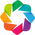

:DynamicMap   [Medal,Age_range]
   :NdOverlay   [Sport]
      :Scatter   [Weight]   (Height)

In [91]:
hv.extension('bokeh')

dynamic_plot = women_medalist_df.hvplot.scatter(
    x='Weight', 
    y='Height',
    by='Sport',          
    groupby=['Medal', 'Age_range'],  
    size=50,             
    alpha=0.5,           
    title="Height vs Weight of Women Medalists by Age Range, Medal, and Sport",
    xlabel='Weight (kg)',
    ylabel='Height (cm)',
    width=800, 
    height=600,
    legend='top_right'
)

dynamic_plot


### Data export

### Conclusion

### References